# Titanic Data Analysis

In [63]:
# Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

## Exploring Data(Without Cleaning)

In [2]:
# Read data 
titanic_df = pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
# Examine first few rows 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data matrix
titanic_df.shape

(891, 12)

In [5]:
# Data Type 
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Get info 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Summary statistics / Numerical Summary
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Drop few columns 
# titanic_df.drop(['Ticket', 'Cabin'], axis=1).head()

In [9]:
# Handling missing values 
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Total missing values 
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Processing

In [11]:
# Let's take a look at first few rows again and convert upper to lower case 
titanic_df.columns = map(str.lower, titanic_df.columns)
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Create a function for male, female and child 
def male_female_child(passenger):
    age, sex = passenger 
    if age < 16:
        return "child"
    else:
        return dict(male='man', female='women')[sex]

In [13]:
# Apply the male_female_child function on DataFrame 
titanic_df['who'] =  titanic_df[['age', 'sex']].apply(male_female_child, axis=1)

In [14]:
titanic_df.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,women
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [15]:
# Create a new column for Pclass
titanic_df['class'] = titanic_df.pclass.map({1: 'first', 2:'second', 3:'third'})

In [16]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third


In [17]:
# Create a new column for adult male 
titanic_df['adult_male'] = titanic_df.who == 'man'

In [18]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class,adult_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third,True


In [19]:
# Create a new column for alone 
titanic_df['alone'] = (titanic_df.parch + titanic_df.sibsp).astype(bool)

In [20]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class,adult_male,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third,True,False


In [21]:
# Create a new column for alive 
titanic_df['alive'] = titanic_df.survived.map({0: 'no', 1: 'yes'})

In [22]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class,adult_male,alone,alive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third,True,True,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first,False,True,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third,False,False,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first,False,True,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third,True,False,no


In [23]:
# Create a new column for embark_town
titanic_df["embark_town"] = titanic_df.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})

In [24]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class,adult_male,alone,alive,embark_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third,True,True,no,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first,False,True,yes,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third,False,False,yes,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first,False,True,yes,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third,True,False,no,Southampton


In [25]:
# Create a new column for deck 
titanic_df["deck"] = titanic_df.cabin.str[0].map(lambda s: np.nan if s == "T" else s)

In [26]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,class,adult_male,alone,alive,embark_town,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,third,True,True,no,Southampton,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,women,first,False,True,yes,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,women,third,False,False,yes,Southampton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,women,first,False,True,yes,Southampton,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,third,True,False,no,Southampton,NaN


In [27]:
# Drop unnecessary columns 
titanic = titanic_df.drop(['name', 'ticket', 'cabin'], axis=1)

In [28]:
# Take a look at new dataset
titanic.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,class,adult_male,alone,alive,embark_town,deck
0,1,0,3,male,22.0,1,0,7.2500,S,man,third,True,True,no,Southampton,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,women,first,False,True,yes,Cherbourg,C
2,3,1,3,female,26.0,0,0,7.9250,S,women,third,False,False,yes,Southampton,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,women,first,False,True,yes,Southampton,C
4,5,0,3,male,35.0,0,0,8.0500,S,man,third,True,False,no,Southampton,NaN


In [29]:
# Drop columns
titanic = titanic_df.drop(["name", "ticket", "cabin"], axis=1)

In [30]:
titanic.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,class,adult_male,alone,alive,embark_town,deck
0,1,0,3,male,22.0,1,0,7.2500,S,man,third,True,True,no,Southampton,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,women,first,False,True,yes,Cherbourg,C
2,3,1,3,female,26.0,0,0,7.9250,S,women,third,False,False,yes,Southampton,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,women,first,False,True,yes,Southampton,C
4,5,0,3,male,35.0,0,0,8.0500,S,man,third,True,False,no,Southampton,NaN


In [31]:
# Summary statistics of new dataset
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Analysis

In [32]:
# Frequency table of sex column
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [33]:
# Relative frequency table of sex column
titanic['sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [34]:
# Frequency table of who column
titanic['who'].value_counts()

man      537
women    271
child     83
Name: who, dtype: int64

In [35]:
# Relative frequency table of who column
titanic['who'].value_counts(normalize=True)

man      0.602694
women    0.304153
child    0.093154
Name: who, dtype: float64

In [36]:
# Frequency table of alive column
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [37]:
# Relative frequency table of alive column
titanic['alive'].value_counts(normalize=True)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

In [38]:
# Frequency table of alone column
titanic['alone'].value_counts()

False    537
True     354
Name: alone, dtype: int64

In [39]:
# Relative frequency table of alone column
titanic['alone'].value_counts(normalize=True)

False    0.602694
True     0.397306
Name: alone, dtype: float64

In [40]:
# Frequency table of class column
titanic['class'].value_counts()

third     491
first     216
second    184
Name: class, dtype: int64

In [41]:
# Relative frequency table of class column
titanic['class'].value_counts(normalize=True)

third     0.551066
first     0.242424
second    0.206510
Name: class, dtype: float64

In [42]:
# Groupby sex and class
titanic.groupby(['sex', 'class']).mean()

passengerid  survived  pclass        age     sibsp     parch  \
sex    class                                                                  
female first    469.212766  0.968085     1.0  34.611765  0.553191  0.457447   
       second   443.105263  0.921053     2.0  28.722973  0.486842  0.605263   
       third    399.729167  0.500000     3.0  21.750000  0.895833  0.798611   
male   first    455.729508  0.368852     1.0  41.281386  0.311475  0.278689   
       second   447.962963  0.157407     2.0  30.740707  0.342593  0.222222   
       third    455.515850  0.135447     3.0  26.507589  0.498559  0.224784   

                     fare  adult_male     alone  
sex    class                                     
female first   106.125798    0.000000  0.638298  
       second   21.970121    0.000000  0.578947  
       third    16.118810    0.000000  0.583333  
male   first    67.226127    0.975410  0.385246  
       second   19.741782    0.916667  0.333333  
       third    12.661633    0.919308  0.239193

In [43]:
# Groupby who and class
titanic.groupby(['who', 'class']).mean()

passengerid  survived  pclass        age     sibsp     parch  \
who   class                                                                  
child first    496.500000  0.833333     1.0   7.820000  0.666667  1.833333   
      second   427.789474  1.000000     2.0   4.543684  0.789474  1.263158   
      third    426.137931  0.431034     3.0   6.817586  2.155172  1.206897   
man   first    454.151261  0.352941     1.0  42.382653  0.302521  0.235294   
      second   446.545455  0.080808     2.0  33.588889  0.292929  0.131313   
      third    457.206897  0.119122     3.0  28.995556  0.294671  0.128527   
women first    469.032967  0.978022     1.0  35.500000  0.549451  0.417582   
      second   450.303030  0.909091     2.0  32.179688  0.454545  0.500000   
      third    395.263158  0.491228     3.0  27.854167  0.728070  0.719298   

                    fare  adult_male     alone  
who   class                                     
child first   139.382633         0.0  1.000000  
      second   28.323905         0.0  1.000000  
      third    23.220190         0.0  0.896552  
man   first    65.951086         1.0  0.369748  
      second   19.054124         1.0  0.272727  
      third    11.340213         1.0  0.175549  
women first   104.317995         0.0  0.626374  
      second   20.868624         0.0  0.515152  
      third    15.354351         0.0  0.517544

In [44]:
# Groupby alive and class
titanic.groupby(['alive', 'class']).mean()

passengerid  survived  pclass        age     sibsp     parch  \
alive class                                                                  
no    first    410.300000       0.0     1.0  43.695312  0.287500  0.300000   
      second   452.123711       0.0     2.0  33.544444  0.319588  0.144330   
      third    453.580645       0.0     3.0  26.555556  0.672043  0.384409   
yes   first    491.772059       1.0     1.0  35.368197  0.492647  0.389706   
      second   439.080460       1.0     2.0  25.901566  0.494253  0.643678   
      third    394.058824       1.0     3.0  20.646118  0.436975  0.420168   

                   fare  adult_male     alone  
alive class                                    
no    first   64.684008    0.962500  0.362500  
      second  19.412328    0.938144  0.298969  
      third   13.669364    0.755376  0.314516  
yes   first   95.608029    0.308824  0.573529  
      second  22.055700    0.091954  0.586207  
      third   13.694887    0.319328  0.420168

In [45]:
# Groupby alive and class
titanic.groupby(['alone', 'class']).mean()

passengerid  survived  pclass        age     sibsp     parch  \
alone class                                                                  
False first    478.458716  0.532110     1.0  41.005814  0.000000  0.000000   
      second   432.086538  0.346154     2.0  33.736559  0.000000  0.000000   
      third    459.435185  0.212963     3.0  28.235556  0.000000  0.000000   
True  first    444.420561  0.728972     1.0  35.849200  0.841121  0.719626   
      second   463.987500  0.637500     2.0  25.391625  0.925000  0.875000   
      third    399.808383  0.299401     3.0  19.784000  1.808383  1.155689   

                    fare  adult_male  
alone class                           
False first    63.672514    0.688073  
      second   14.066106    0.692308  
      third     9.272052    0.811728  
True  first   105.019706    0.411215  
      second   29.237084    0.337500  
      third    22.218864    0.335329

In [46]:
# Groupby adult and class
titanic.groupby(['adult_male', 'class']).mean()

passengerid  survived  pclass        age     sibsp  \
adult_male class                                                        
False      first    470.731959  0.969072     1.0  33.612727  0.556701   
           second   445.270588  0.929412     2.0  25.853373  0.529412   
           third    405.674419  0.470930     3.0  18.468615  1.209302   
True       first    454.151261  0.352941     1.0  42.382653  0.302521   
           second   446.545455  0.080808     2.0  33.588889  0.292929   
           third    457.206897  0.119122     3.0  28.995556  0.294671   

                      parch        fare     alone  
adult_male class                                   
False      first   0.505155  106.486941  0.649485  
           second  0.670588   22.535099  0.623529  
           third   0.883721   18.006785  0.645349  
True       first   0.235294   65.951086  0.369748  
           second  0.131313   19.054124  0.272727  
           third   0.128527   11.340213  0.175549

## Plotting

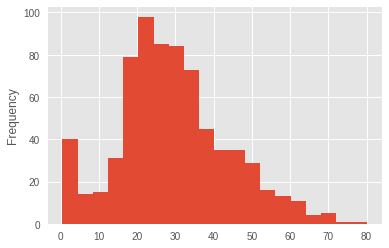

In [64]:
# Distribution of age 
titanic.age.plot(kind='hist', bins=20);

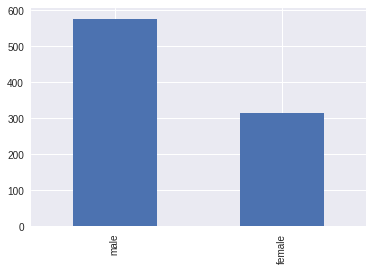

In [48]:
# Who were male or female?
titanic['sex'].value_counts().plot(kind='bar');

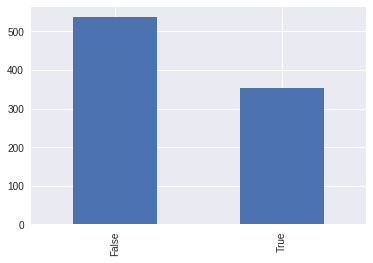

In [49]:
# Who was alone?
titanic['alone'].value_counts().plot(kind='bar');

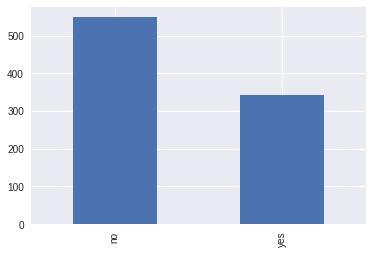

In [50]:
# who was alive?
titanic['alive'].value_counts().plot(kind='bar');

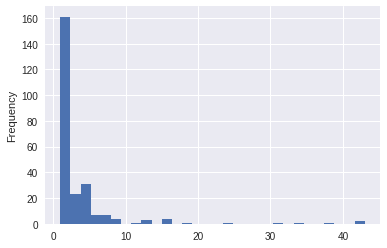

In [59]:
titanic.fare.value_counts().plot(kind='hist', bins=30);

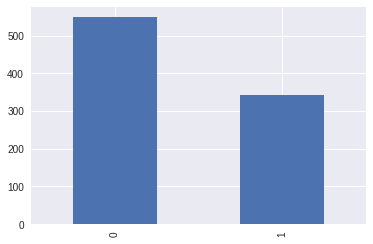

In [60]:
titanic.survived.value_counts().plot(kind='bar');